In [112]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
with MPRester("P2FTs1l6Xaon8AOI") as m: 
    bandstructure = m.get_bandstructure_by_material_id("mp-28240")

In [113]:
print("Détermination bande interdite : ")
print("\n")
BG = bandstructure.get_band_gap()
if BG['direct'] == False :
    band = "indirecte"
else:
    band = "directe"
print("Bande interdite", band, "de", BG['energy'], "eV (isolant), lorsque le vecteur d'onde k évolue dans la direction ", BG['transition'], "de la zone de Brillouin du cristal")

Détermination bande interdite : 


Bande interdite indirecte de 4.8952 eV (isolant), lorsque le vecteur d'onde k évolue dans la direction  L-(0.093,-0.125,0.093) de la zone de Brillouin du cristal


La pente max dans la bande de valence vaut : 0.7916132606268965 correspondant a une dispersion max dans la direction P1 -Q1
Représenté par la flèche rouge sur le graphe
La pente min dans la bande de valence vaut : 0.009632606431461002 correspondant a une dispersion min dans la direction Γ -F
Représenté par la flèche bleue sur le graphe


La pente max dans la bande de conduction vaut : 1.3036540143326698 correspondant a une dispersion max dans la direction P1 -Q1
Représenté par la flèche verte sur le graphe
La pente min dans la bande de conduction vaut : 0.019788724082023795 correspondant a une dispersion min dans la direction Γ -F
Représenté par la flèche jaune sur le graphe


Structures des bandes électroniques du CSO :


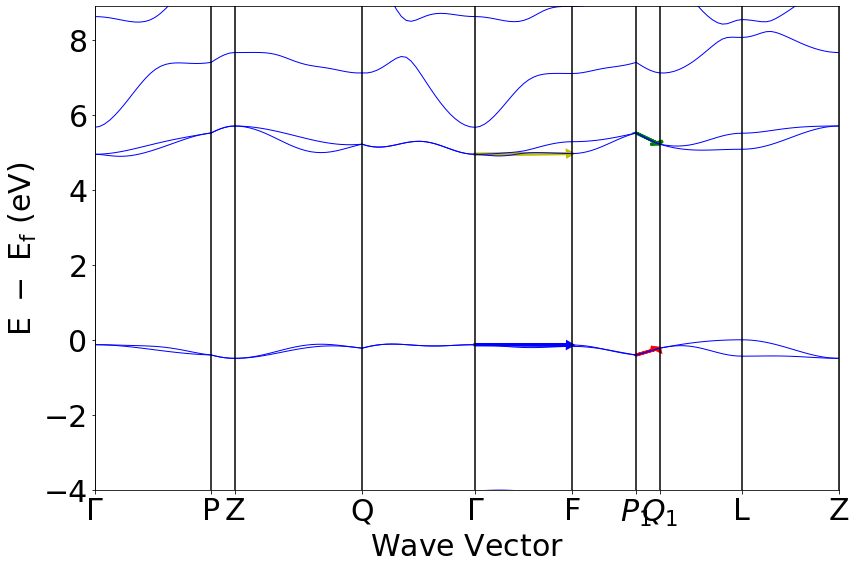

In [114]:
bandplot = BSPlotter(bandstructure)
data = bandplot.bs_plot_data()
pl = bandplot.get_plot()
E = data.get('energy')
D = data.get('ticks').get('distance')
vbm = bandstructure.get_vbm()
# print("Index vbm :" , vbm['band_index'])  --> me donne la dernière bande de valence 
cbm = bandstructure.get_cbm()
# print("Index cbm :" ,cbm['band_index']) --> me donne la dernière bande de conduction

Vindex = 7
Cindex = 8

DD = [D[0], D[1], D[3], D[5], D[7], D[9], D[11], D[14], D[15], D[17]]
slopeV = np.zeros(9)
slopeC = np.zeros(9)
for ii in range(0,9):
    DeltaD = DD[ii+1]-DD[ii]
    slopeV[ii] = abs(((E[ii].get('1')[Vindex])[-1] - (E[ii].get('1')[Vindex])[0])/(DeltaD) )
    slopeC[ii] = abs(((E[ii].get('1')[Cindex])[-1] - (E[ii].get('1')[Cindex])[0])/(DeltaD) )

maxV = np.amax(slopeV) #slope7
minV = np.amin(slopeV) #slope5
print("La pente max dans la bande de valence vaut :", maxV, "correspondant a une dispersion max dans la direction P1 -Q1")
print("Représenté par la flèche rouge sur le graphe")
print("La pente min dans la bande de valence vaut :", minV, "correspondant a une dispersion min dans la direction \u0393 -F")
print("Représenté par la flèche bleue sur le graphe")
print("\n")
maxC = np.amax(slopeC) #slope7
minC = np.amin(slopeC) #slope5
print("La pente max dans la bande de conduction vaut :", maxC, "correspondant a une dispersion max dans la direction P1 -Q1")
print("Représenté par la flèche verte sur le graphe")
print("La pente min dans la bande de conduction vaut :", minC, "correspondant a une dispersion min dans la direction \u0393 -F")
print("Représenté par la flèche jaune sur le graphe")
print("\n")

#maxV
plt.arrow(DD[6], (E[6].get('1')[Vindex])[0], DD[7] - DD[6], (E[6].get('1')[Vindex])[-1] - (E[6].get('1')[Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
#minV
plt.arrow(DD[4], (E[4].get('1')[Vindex])[0], DD[5] - DD[4], (E[4].get('1')[Vindex])[-1] - (E[4].get('1')[Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
#maxC
plt.arrow(DD[6], (E[6].get('1')[Cindex])[0], DD[7] - DD[6], (E[6].get('1')[Cindex])[-1] - (E[6].get('1')[Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
#minC
plt.arrow(DD[4], (E[4].get('1')[Cindex])[0], DD[5] - DD[4], (E[4].get('1')[Cindex])[-1] - (E[4].get('1')[Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

print("Structures des bandes électroniques du CSO :")
plt.show()

In [115]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)
print("Masse effective dans la bande de valence")
dist = data.get('distances')

print("En supposant une dispersion parabolique, on peut prendre le point d'energie maximum dans la bande de valence, et un deuxième point pour obtenir l'equation de la parabole")
print("Point maximal : (",DD[8], ",", E[8].get('1')[Vindex][0], "), point sur la branche L" )
print("Second point : (",DD[7], ",", E[7].get('1')[Vindex][0], "), point sur la branche Q1" )

a = (E[7].get('1')[Vindex][0])/(DD[8]-DD[7])**2

d2E =  2*a*(A**(2))*eV
print("\n")
print("On obtient donc l'equation de la parabole suivante : f(k) =", a, "(k-", DD[8], ")²")
print("Dont on peut calculer la dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("On peut calculer la masse effective m* =", hbar**2/d2E, "[kg]")

Masse effective dans la bande de valence
En supposant une dispersion parabolique, on peut prendre le point d'energie maximum dans la bande de valence, et un deuxième point pour obtenir l'equation de la parabole
Point maximal : ( 6.333492245275919 , 0.0 ), point sur la branche L
Second point : ( 5.530621059625315 , -0.22409999999999997 ), point sur la branche Q1


On obtient donc l'equation de la parabole suivante : f(k) = -0.34765630740839737 (k- 6.333492245275919 )²
Dont on peut calculer la dérivée seconde f''(k) = -0.6953126148167947 [eV.A^2]  = -1.1140135754177153e-39 [J.m^2]
Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
On peut calculer la masse effective m* = -9.983017656699731e-30 [kg]


In [116]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)
print("Masse effective dans la bande de conduction")
dist = data.get('distances')

print("En supposant une dispersion parabolique, on peut prendre le point d'energie minimum dans la bande de conduction, et un deuxième point pour obtenir l'equation de la parabole")
print("Point maximal : (",dist[0][5], ",", E[0].get('1')[Cindex][5], "), point entre les branches \u0393 et P" )
print("Second point : (",DD[0], ",", E[0].get('1')[Cindex][0], "), point sur la branche \u0393" )

a = (E[0].get('1')[Cindex][0] - E[0].get('1')[Cindex][5])/(DD[0]-dist[0][5])**2

d2E =  2*a*(A**(2))*eV

print("\n")
print("On obtient donc l'equation de la parabole suivante : f(k) =", a, "(k-", DD[8], ")² +", E[0].get('1')[Cindex][5])
print("Dont on peut calculer la dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("On peut calculer la masse effective m* =", hbar**2/d2E, "[kg]")

Masse effective dans la bande de conduction
En supposant une dispersion parabolique, on peut prendre le point d'energie minimum dans la bande de conduction, et un deuxième point pour obtenir l'equation de la parabole
Point maximal : ( 0.24799718789759492 , 4.8952 ), point entre les branches Γ et P
Second point : ( 0.0 , 4.9497 ), point sur la branche Γ


On obtient donc l'equation de la parabole suivante : f(k) = 0.886141323903908 (k- 6.333492245275919 )² + 4.8952
Dont on peut calculer la dérivée seconde f''(k) = 1.772282647807816 [eV.A^2]  = 2.839509721329266e-39 [J.m^2]
Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
On peut calculer la masse effective m* = 3.916597682219608e-30 [kg]
